# Vernon Low

In [1]:
import pandas as pd

In [2]:
df = pd.read_parquet("amalgamated.parquet")

In [3]:
vars = [
    "ETH-CAD_High",
    "ETH-CAD_Low",
    "BTC-CAD_High",
    "BTC-CAD_Low",
    "AdrBalNtv0.01Cnt",
    "AdrBalNtv0.1Cnt",
    "AdrBalNtv1Cnt",
    "AdrBalNtv10Cnt",
    "BlkSizeMeanByte",
    "CapRealUSD",
    "FeeByteMeanNtv",
    "FlowInExNtv",
    "FlowOutExNtv",
    "FlowTfrFromExCnt",
    "GasUsedTxMean",
    "NDF",
    "SplyAct1d",
    "SplyActPct1yr",
    "TxCnt",
    "VelCur1yr",
    'Global_Liquidity_Index'
]


df = df[vars]

In [4]:
# Assuming df is your DataFrame
#df = df.pct_change() * 100

# The first row will be NaN because there's no previous data to subtract from the first entry
# If you wish to remove the NaN values, you can drop the first row
df.dropna(inplace=True)

df

,ETH-CAD_High,ETH-CAD_Low,BTC-CAD_High,BTC-CAD_Low,AdrBalNtv0.01Cnt,AdrBalNtv0.1Cnt,AdrBalNtv1Cnt,AdrBalNtv10Cnt,BlkSizeMeanByte,CapRealUSD,...,FlowInExNtv,FlowOutExNtv,FlowTfrFromExCnt,GasUsedTxMean,NDF,SplyAct1d,SplyActPct1yr,TxCnt,VelCur1yr,Global_Liquidity_Index
2019-04-10,243.850067,233.455215,7222.453125,6922.804688,5852149,2498307,946506,241675,22604.443842,2.600059e+10,...,652727.539118,664687.434194,30935,64542.928792,0.643228,1.128653e+07,68.702818,674070,8.253820,15763.904344
2019-04-11,236.404099,216.744598,7134.264648,6700.027344,5855391,2500814,945792,241680,24120.096491,2.591913e+10,...,665854.926704,732842.668127,32185,61210.885270,0.642956,1.108390e+07,68.670073,729032,8.266696,15429.280313
2019-04-12,221.268066,215.401428,6802.552734,6629.196289,5822176,2482677,945504,241730,20339.050312,2.589640e+10,...,530283.379688,567581.232267,25662,59082.110788,0.642661,1.074513e+07,68.670112,694793,8.268599,15012.490510
2019-04-13,221.835815,217.367996,6836.755859,6749.371094,5812637,2479791,945903,242190,17601.024371,2.585180e+10,...,308396.727523,371997.033800,21413,61141.225004,0.642345,1.006436e+07,68.672716,614291,8.259578,14025.330765
2019-04-14,224.728149,216.914780,6910.552734,6734.143066,5817917,2483060,947550,242735,17001.908284,2.588382e+10,...,354086.636315,404859.573708,20688,68049.051409,0.641738,9.130682e+06,68.626068,551055,8.266103,14086.338730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-01,3148.913574,3042.415771,58550.632812,56831.171875,24720293,5199047,1729337,344532,144260.110285,1.668265e+11,...,333278.414166,322887.344200,103580,95636.857858,0.677078,1.217375e+07,36.087370,1127338,6.056708,123571.494066
2024-02-02,3088.287109,3013.004883,57877.652344,56241.656250,24732407,5195599,1729374,344511,149793.691422,1.667400e+11,...,224978.990905,335365.852424,103742,97339.905076,0.677616,1.248846e+07,35.971409,1108172,6.045875,122242.497035
2024-02-03,3107.525391,3067.862793,58432.644531,57157.976562,24733683,5185916,1728662,344395,153626.986371,1.665798e+11,...,88094.093613,110625.486725,93780,102296.542796,0.677607,1.176235e+07,35.937981,1054604,6.036129,121766.009277
2024-02-04,3136.216309,3090.657471,58429.691406,57797.507812,24723204,5169224,1728661,344281,153334.124877,1.664679e+11,...,155456.643029,152343.252309,89438,102710.415043,0.678024,9.964788e+06,35.919804,1049649,6.033078,122454.072998


In [5]:
import pandas as pd
import numpy as np
import torch

from gluonts.dataset.common import ListDataset
from gluonts.torch.model.tft import TemporalFusionTransformerEstimator
from gluonts.transform.feature import MissingValueImputation

torch.set_float32_matmul_precision('medium')
                                   
# Assuming df is your DataFrame with the data
target_column = 'ETH-CAD_Low'  # Replace with your target column name

# Ensure the DataFrame's index is a datetime index and set the frequency explicitly if needed
df.index = pd.to_datetime(df.index)
freq = "D"  # Set the frequency of your data, e.g., 'D' for daily. Adjust as needed.
df = df.asfreq(freq)

# Define the prediction length
prediction_length = 1  # Set your prediction length

# Select dynamic features from the DataFrame, excluding the target column
past_dynamic_feature_columns = df.columns.drop(target_column)  # This excludes the target column

# Extract dynamic features as a numpy array
past_dynamic_features = df[past_dynamic_feature_columns].values.transpose()

# Assuming all dynamic features are known in the future, adjust the dimensions accordingly
past_dynamic_dims  = [1] * len(past_dynamic_feature_columns)  # Adjust based on actual dynamic features

# Make sure the lengths match when creating ListDataset
training_data = ListDataset([
    {
        "start": df.index[0],
        "target": df[target_column][:-prediction_length],
        "past_feat_dynamic_real": past_dynamic_features[:, :-prediction_length]
    }
], freq=freq)

# Adjust the slicing for dynamic features for the test dataset to ensure correct dimensions
test_past_dynamic_features_sliced = past_dynamic_features[:, -prediction_length:]

test_data = ListDataset([
    {
        "start": df.index[-prediction_length],
        "target": df[target_column][-prediction_length:].values,
        "past_feat_dynamic_real": test_past_dynamic_features_sliced
    }
], freq=freq)

# Initialize the Temporal Fusion Transformer Estimator
estimator = TemporalFusionTransformerEstimator(
    freq=freq,
    prediction_length=prediction_length,
    context_length=7,  # Optional: adjust based on your needs
    num_heads=32,
    hidden_dim=1024,
    variable_dim=1024,
    past_dynamic_dims= past_dynamic_dims,
    quantiles=[0.1, 0.5, 0.9],  # Specifying the quantiles for forecasting
    lr=0.001,
    weight_decay=1e-08,
    dropout_rate=0.1,
    patience=10,
    batch_size=128,
    num_batches_per_epoch=100,
    trainer_kwargs={'max_epochs': 500},  # Adjust 'gpus' based on your setup
)

# Train the model
predictor = estimator.train(training_data)

# Debugging: Print dimensions to verify alignment
print(f"Past Dynamic Features Training Shape: {past_dynamic_features[:, :-prediction_length].shape}")
print(f"Past Dynamic Features Test Shape: {test_past_dynamic_features_sliced.shape}")

# Collect actual and predicted values for evaluation, including percentiles
actuals = df[target_column][-prediction_length:].values
mean_predictions = []
p10_predictions = []
p50_predictions = []
p90_predictions = []

for forecast in predictor.predict(test_data):
    mean_predictions.append(forecast.mean)
    p10_predictions.append(forecast.quantile(0.1))
    p50_predictions.append(forecast.quantile(0.5))  # Median
    p90_predictions.append(forecast.quantile(0.9))

# Convert lists to numpy arrays for slicing
mean_predictions = np.array(mean_predictions).flatten()[:prediction_length]
p10_predictions = np.array(p10_predictions).flatten()[:prediction_length]
p50_predictions = np.array(p50_predictions).flatten()[:prediction_length]
p90_predictions = np.array(p90_predictions).flatten()[:prediction_length]


Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\Windows\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightning\pytorch\trainer\configuration_validator.py:74: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type                           | Params | In sizes                                                                      | Out sizes
-----------------------------------------------------------------------------------------------------------------------------------------------------
0 | model | Temp

Training: |                                                                                      | 0/? [00:00<…

Epoch 0, global step 100: 'train_loss' reached 170.80540 (best 170.80540), saving model to 'C:\\Users\\Windows\\Desktop\\GZS\\trading\\eth\\vernon\\lightning_logs\\version_3\\checkpoints\\epoch=0-step=100.ckpt' as top 1
Epoch 1, global step 200: 'train_loss' reached 122.25587 (best 122.25587), saving model to 'C:\\Users\\Windows\\Desktop\\GZS\\trading\\eth\\vernon\\lightning_logs\\version_3\\checkpoints\\epoch=1-step=200.ckpt' as top 1
Epoch 2, global step 300: 'train_loss' reached 109.78166 (best 109.78166), saving model to 'C:\\Users\\Windows\\Desktop\\GZS\\trading\\eth\\vernon\\lightning_logs\\version_3\\checkpoints\\epoch=2-step=300.ckpt' as top 1
Epoch 3, global step 400: 'train_loss' reached 107.41857 (best 107.41857), saving model to 'C:\\Users\\Windows\\Desktop\\GZS\\trading\\eth\\vernon\\lightning_logs\\version_3\\checkpoints\\epoch=3-step=400.ckpt' as top 1
Epoch 4, global step 500: 'train_loss' reached 100.38341 (best 100.38341), saving model to 'C:\\Users\\Windows\\Desktop\

Past Dynamic Features Training Shape: (20, 1762)
Past Dynamic Features Test Shape: (20, 1)


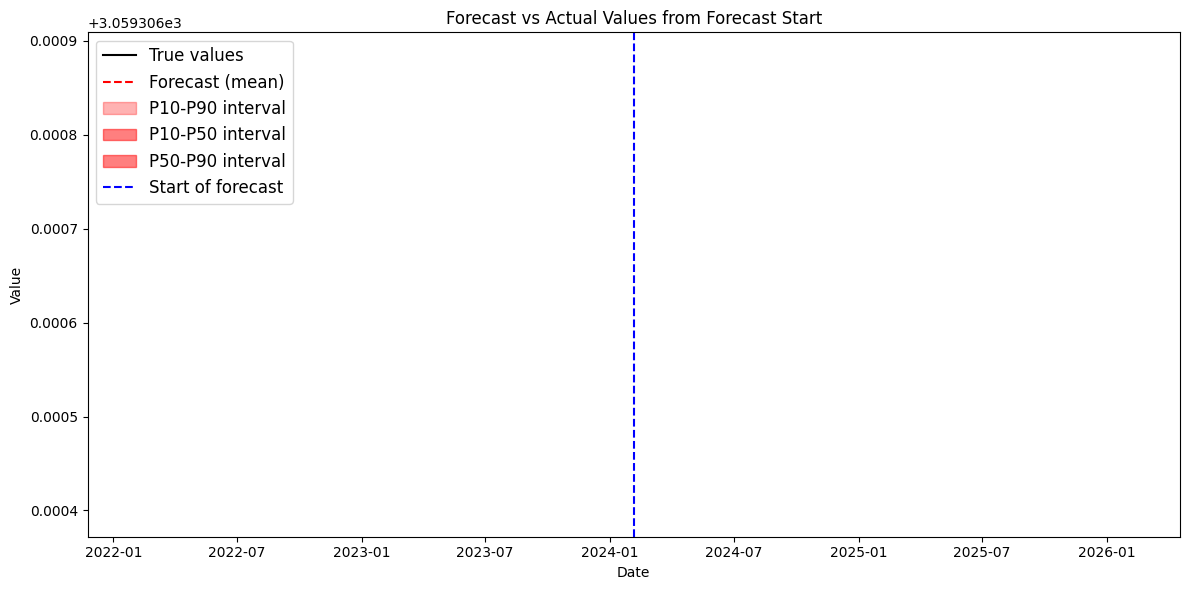

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the data, and it's sorted by the index (date)
target_column = 'ETH-CAD_Low'  # Ensure this matches your actual target column name

# Assuming the DataFrame's index is a datetime index and sorted
end_training = df.index[-prediction_length-1]  # Assuming prediction_length is defined earlier

# Ensure forecast_start_date is a datetime object and exists in df.index
forecast_start_date = end_training + pd.Timedelta(days=1)

# Plot the forecast and actual values starting from the forecast start date
plt.figure(figsize=(12, 6))

# Plot actual values from the start of the forecast
actuals_start_index = df.index.get_loc(forecast_start_date)
plt.plot(df.index[actuals_start_index:], df[target_column][actuals_start_index:], label="True values", color="black")

# Assuming mean_predictions, p10_predictions, p50_predictions, p90_predictions are defined from the forecasting model
# Plot forecast values
forecast_index = pd.date_range(start=forecast_start_date, periods=prediction_length, freq=freq)  # freq should be defined as per your data's frequency
plt.plot(forecast_index, mean_predictions, color='red', linestyle='--', label="Forecast (mean)")
plt.fill_between(forecast_index, p10_predictions, p90_predictions, color='red', alpha=0.3, label="P10-P90 interval")
plt.fill_between(forecast_index, p10_predictions, p50_predictions, color='red', alpha=0.5, label="P10-P50 interval")
plt.fill_between(forecast_index, p50_predictions, p90_predictions, color='red', alpha=0.5, label="P50-P90 interval")

# Add a vertical line and other plot elements
plt.axvline(x=forecast_start_date, color='blue', linestyle='--', label='Start of forecast')
plt.legend(loc="upper left", fontsize="large")
plt.title('Forecast vs Actual Values from Forecast Start')
plt.xlabel('Date')
plt.ylabel('Value')
plt.tight_layout()
plt.show()


In [7]:
# Function to calculate sMAPE
def calculate_smape(forecasts, actuals):
    return 100 * np.mean(2 * np.abs(forecasts - actuals) / (np.abs(actuals) + np.abs(forecasts)))

# Calculate standard evaluation metrics for mean predictions
mae = np.mean(np.abs(mean_predictions - actuals))
rmse = np.sqrt(np.mean(np.square(mean_predictions - actuals)))
mape = np.mean(np.abs((mean_predictions - actuals) / actuals)) * 100
smape = calculate_smape(mean_predictions, actuals)

# Calculate the percentage of actuals within the 10th to 90th percentile range
within_range = np.sum((actuals >= p10_predictions) & (actuals <= p90_predictions)) / len(actuals) * 100

print("Evaluation Metrics for Mean Predictions:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")
print(f"sMAPE: {smape:.2f}%")
print(f"Percentage of Actuals within P10-P90 Interval: {within_range:.2f}%")


Evaluation Metrics for Mean Predictions:
MAE: 0.00
RMSE: 0.00
MAPE: 0.00%
sMAPE: 0.00%
Percentage of Actuals within P10-P90 Interval: 0.00%


In [8]:
import os
import torch

# Define a path to save the model
model_save_path = 'vernon_low.pth'

# Assuming 'predictor' is the trained model from DeepAREstimator
torch.save(predictor, model_save_path)

print(f'Model saved to {model_save_path}')


Model saved to vernon_low.pth
